In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from operator import itemgetter




In [65]:

file_name = 'C:/insert local path/SenatorTimScotttweets_clean_P.csv'


In [66]:
#creating list of seperate tweets

def tweet_list(file_name):
    with open(file_name, mode='r', encoding='utf-8') as f:
        reader = f.read()
    tweets = reader.strip().split('\n')
    tweets = [tweet.strip() for tweet in tweets if tweet.strip()]
   
    return tweets

tweets_list = tweet_list(file_name)

# Loading the tweets as a panda-dataframe
df = pd.DataFrame(tweets_list, columns=['tweets'])


In [67]:
texts = df['tweets'].tolist()


tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=1000,
    ngram_range=(1, 2)
)

tfidf = tfidf_vectorizer.fit_transform(texts)

In [68]:
#defining nmf (source https://www.kaggle.com/code/rockystats/topic-modelling-using-nmf#Coherence-Score)
nmf = NMF(
    n_components=20,
    init='nndsvd'
).fit(tfidf)

Coherence score 

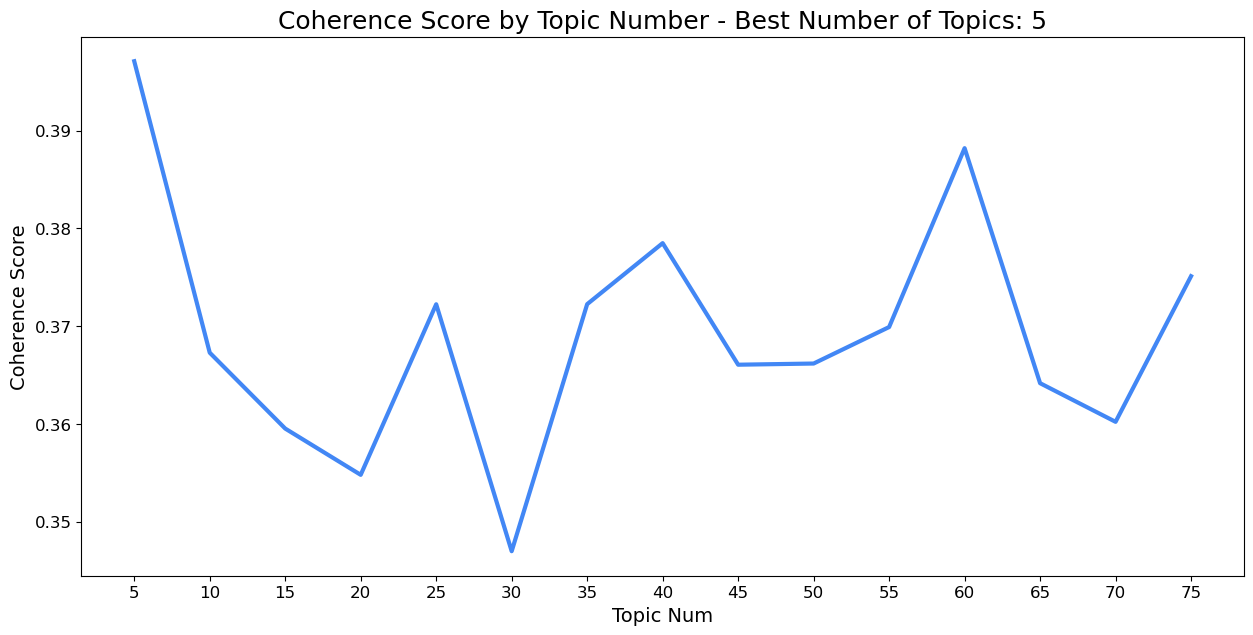

In [69]:
# Use Gensim's NMF to get the best num of topics via coherence score (source https://www.kaggle.com/code/rockystats/topic-modelling-using-nmf#Coherence-Score )
texts = [doc.split() for doc in df['tweets']]

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=3000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()




In [73]:
print(scores)

[(5, 0.3971), (10, 0.3673), (15, 0.35954), (20, 0.35481), (25, 0.37225), (30, 0.347), (35, 0.37226), (40, 0.3785), (45, 0.36607), (50, 0.36619), (55, 0.36992), (60, 0.38821), (65, 0.36418), (70, 0.36023), (75, 0.37512)]


In [72]:
#list of best number oftopics: 
coherence_score = [10 , 10, 15, 10, 5, 5 ]
np.mean(coherence_score)

9.166666666666666